In [2]:
# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
!pip install tensorflow 
!pip install keras

import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


In [3]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
# Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
import pandas as pd
# Loading the Wine Quality dataset
wine_data = pd.read_csv("./wine.csv")

# Exploring the dimensions of the dataset
print("Dimensions of the Wine Quality dataset:", wine_data)

Dimensions of the Wine Quality dataset:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6   

In [4]:
# Q3. Check for null values, identify categorical variables, and encode them.
# Identify categorical variables
from sklearn.preprocessing import LabelEncoder
# Check for null values
print("Null values:\n", wine_data.isnull().sum())

# Identify categorical variables
categorical_vars = wine_data.select_dtypes(include=["object"]).columns.tolist()
print("Categorical variables:", categorical_vars)

# Encode categorical variables
label_encoder = LabelEncoder()
wine_data[categorical_vars] = wine_data[categorical_vars].apply(label_encoder.fit_transform)

# Display the updated dataset
print("\nEncoded Wine Quality dataset:\n", wine_data.head())

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables: ['quality']

Encoded Wine Quality dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.99

In [5]:
# Q4. Separate the features and target variables from the dataframe.
X=wine_data.drop('quality',axis=1)
y=wine_data["quality"]
X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [6]:
# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

from sklearn.model_selection import train_test_split
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train,X_val


(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 242             7.7             0.580         0.10             1.8      0.102   
 531            11.9             0.380         0.49             2.7      0.098   
 568             9.8             0.500         0.49             2.6      0.250   
 1098            8.0             0.310         0.45             2.1      0.216   
 514            10.5             0.510         0.64             2.4      0.107   
 ...             ...               ...          ...             ...        ...   
 1349            6.9             0.570         0.00             2.8      0.081   
 1306            9.7             0.690         0.32             2.5      0.088   
 206            12.8             0.300         0.74             2.6      0.095   
 830             7.5             0.685         0.07             2.5      0.058   
 742             6.5             0.615         0.00             1.9      0.065   
 
       free su

In [7]:
# Q6. Perform scaling on the dataset.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)

# Display the scaled features
print("Scaled Features:\n", scaled_features_df.head())


Scaled Features:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.58477

In [12]:
# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))



In [13]:
# Q8. Create a Sequential model and add all the layers to it.

## Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 0.6350 - accuracy: 0.6536 - val_loss: 0.5513 - val_accuracy: 0.7188
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7428 - val_loss: 0.5210 - val_accuracy: 0.7156
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7568 - val_loss: 0.5120 - val_accuracy: 0.7344
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7678 - val_loss: 0.5114 - val_accuracy: 0.7312
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7780 - val_loss: 0.5071 - val_accuracy: 0.7406
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7787 - val_loss: 0.5343 - val_accuracy: 0.7094
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7795 - val_loss: 0.4987 - val_accuracy: 0.7375
Epoch 8/10
40/40 [==

In [14]:
# Q9 Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,073
Trainable params: 7,073
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
# Q11. Compile the model with the specified loss function, optimizer, and metrics.
# Q12. Fit the model to the training data using appropriate batch size and number of epochs.
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with EarlyStopping
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 0.3748 - accuracy: 0.8327 - val_loss: 0.4853 - val_accuracy: 0.7750
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8436 - val_loss: 0.5119 - val_accuracy: 0.7531
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.8468 - val_loss: 0.4997 - val_accuracy: 0.7594
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8468 - val_loss: 0.4981 - val_accuracy: 0.7656
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8616 - val_loss: 0.4848 - val_accuracy: 0.7781
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8593 - val_loss: 0.5151 - val_accuracy: 0.7625
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8600 - val_loss: 0.5017 - val_accuracy: 0.7719
Epoch 8/10
40/40 [==

In [19]:
# Q13. Get the model's parameters.
# Get the model's parameters
parameters = []
for layer in model.layers:
    layer_parameters = layer.get_weights()
    parameters.append(layer_parameters)

print(parameters)

[[array([[-0.04006536,  0.16159086,  0.13026841, -0.14291644, -0.18720408,
        -0.00537519, -0.01537021,  0.28261152,  0.06178157,  0.05394354,
        -0.00867133, -0.10763438,  0.30077872, -0.19487043, -0.0554584 ,
         0.00521111, -0.19111674,  0.20221394, -0.14155892,  0.01642912,
         0.02801042, -0.13451557, -0.03262288,  0.26144552, -0.2979494 ,
        -0.01417468, -0.00172144,  0.2896146 , -0.1099788 ,  0.23973843,
        -0.00098954, -0.29494673, -0.22467655,  0.30364588,  0.10870247,
         0.24784026,  0.20030645, -0.0042967 ,  0.11740807,  0.11934055,
        -0.15212475,  0.08372441, -0.22106498,  0.11356223, -0.00724033,
        -0.19086772,  0.10055413, -0.01797428,  0.15159133,  0.11984203,
         0.13044398, -0.03434438,  0.08849061,  0.305927  , -0.05591442,
         0.01403297,  0.01411093, -0.00871899,  0.12947474,  0.1987389 ,
        -0.24582121, -0.06736385, -0.23796847,  0.24351506],
       [-0.12789242, -0.20577647, -0.03252896, -0.00251219,  

In [20]:
# Q14. Store the model's training history as a Pandas DataFrame.

# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

       loss  accuracy  val_loss  val_accuracy
0  0.374753  0.832682  0.485261      0.775000
1  0.356055  0.843628  0.511913      0.753125
2  0.351258  0.846755  0.499708      0.759375
3  0.345989  0.846755  0.498092      0.765625
4  0.332005  0.861611  0.484785      0.778125
5  0.328123  0.859265  0.515103      0.762500
6  0.330415  0.860047  0.501724      0.771875
7  0.314955  0.863956  0.511958      0.775000
8  0.313195  0.865520  0.502430      0.753125
9  0.311026  0.874120  0.505187      0.778125


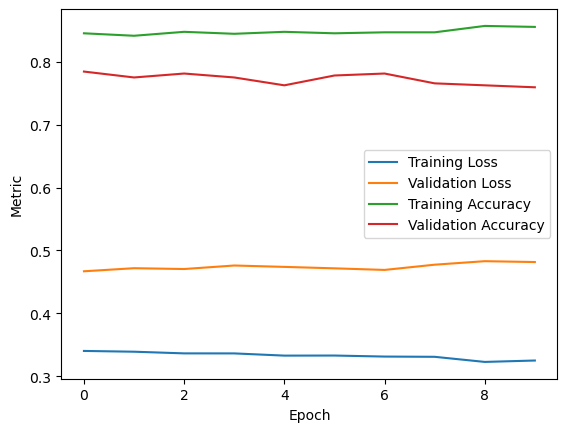

In [53]:
# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [21]:
# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7781
Test Loss: 0.5051870942115784
Test Accuracy: 0.778124988079071
